# No Show Appointments 

# Introduction
<font size="3">The Medical Appointment No Shows dataset has records of over 100k medical appointments and a very curious question of "Why do 30% of patients miss their scheduled appointments?" What are the different factors that affect the percentage of missed appointments? </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<font size="3">Defining a function to plot a bar graph as we will use it a lot</font>

In [2]:
#The function takes the following parameters and plots a Bar chart
#Takes the x-labels, their heights, the plot's title, takes a Y-label and a colour
def bar_graph( x_labels, heights, title, ylabel, colour):
    plt.bar(x_labels, heights, color =colour)
    plt.title(title)
    plt.ylabel(ylabel);

# Data Wrangling

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<font size="3">Renaming the columns for easier handling</font>

In [5]:
df = df.rename(columns = {'PatientId': 'patient_id', 'AppointmentID': 'appointment_id',
                          'Gender':'gender', 'ScheduledDay':'scheduled_day',
                          'AppointmentDay':'appointment_day','Age':'age',
                          'Neighbourhood': 'hospital_location','Scholarship':"scholarship",
                          'Hipertension':'hipertension','Diabetes':'diabetes',
                          'Alcoholism':'alcoholism', 'Handcap': 'handicap',
                          'SMS_received':'sms_received', 'No-show':'no_show'})


In [6]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,hospital_location,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<font size="3">Replacing No and Yes in the no_show column to avoid confusion</font>

In [7]:
df['no_show'].loc[(df['no_show'] == 'No')] = 0
df['no_show'].loc[(df['no_show'] == 'Yes')] = 1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<font size="3">Converting the type of no_show column to int</font>

In [8]:
df.no_show = df.no_show.astype(int)

<font size="3">Checking for duplicates rows and nan values</font>

In [9]:
df.duplicated().sum(), df.isna().sum().sum()

(0, 0)

<font size="3">Suppressing scientific notation by changing the type to int</font>

In [10]:
df['patient_id'] = df['patient_id'].astype(int)

<font size="3">Removing hours and minutes from scheduled day and appointment day</font>

In [11]:
df.scheduled_day = pd.to_datetime(df['scheduled_day']).dt.date
df.appointment_day = pd.to_datetime(df['appointment_day']).dt.date

<font size="3">Dropping unwanted columns</font>

In [12]:
df.drop(columns = ['hospital_location', 'appointment_id'], inplace = True)

In [13]:
df.describe()

,patient_id,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<font size="3">Dropping the row that has -1 as age</font>

In [14]:
df = df[df.age != -1]

<font size="3">Changing handicap values to 1 or 0</font>

In [15]:
df["handicap"].replace({2: 1, 3: 1, 4:1}, inplace=True)

In [16]:
df.handicap.unique()

array([0, 1])

# Exploratory Data Analysis

<font size="5">Does scheduling an appointment on the same day differ in no-show rate?</font>

<font size="3">First let's take a look at the dataframe's histograms for early insight</font>

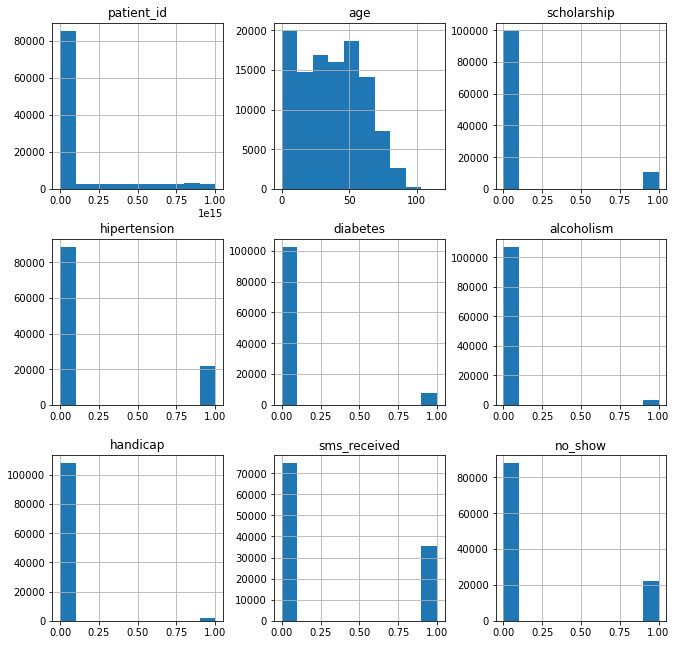

In [17]:
df.hist(figsize = (11, 11));

In [18]:
df_same_day = df.query('scheduled_day == appointment_day')
df_different_day = df.query('scheduled_day != appointment_day')


In [19]:
same_day_noshow_count = df_same_day.query('no_show == 1').count()

In [20]:
pro_same_day_noshow_count = same_day_noshow_count['patient_id'] / df_same_day['patient_id'].count()

pro_same_day_noshow_count

0.046470618743841084

In [21]:
different_day_noshow_count = df_different_day.query('no_show == 1').count()


In [22]:
pro_different_day_noshow_count = different_day_noshow_count['patient_id'] / df_different_day['patient_id'].count()

pro_different_day_noshow_count

0.28523984214329384

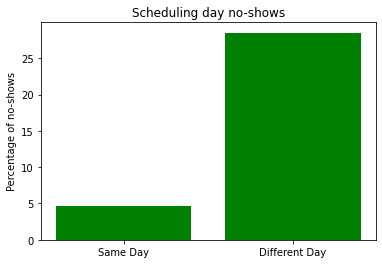

In [23]:
heights = [pro_same_day_noshow_count * 100, pro_different_day_noshow_count * 100]
x_labels = ['Same Day', 'Different Day']
bar_graph(x_labels, heights, 'Scheduling day no-shows', 'Percentage of no-shows', 'g')

<font size="3">People scheduling an appointment on a different day are way more likely to not show up</font>

<font size="5">Does sending an sms to the patient make a difference in no-show rate?</font>

In [24]:
df_sms = df.query('sms_received == 1')
df_nosms = df.query('sms_received == 0')

In [25]:
sms_noshow_count = df_sms.query('no_show == 1').count()
nosms_noshow_count = df_nosms.query('no_show == 1').count()

In [26]:
pro_sms_noshow_count =  sms_noshow_count['patient_id'] / df_sms['patient_id'].count()
pro_nosms_noshow_count =  nosms_noshow_count['patient_id'] / df_nosms['patient_id'].count()
pro_sms_noshow_count, pro_nosms_noshow_count

(0.27574544839637, 0.16703533926762965)

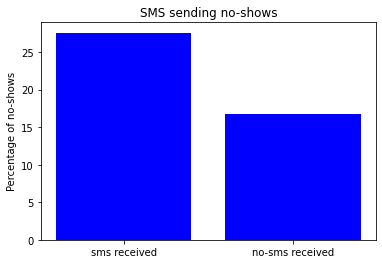

In [27]:
heights = [pro_sms_noshow_count * 100, pro_nosms_noshow_count * 100]
x_labels = ['sms received', 'no-sms received']
bar_graph(x_labels, heights, 'SMS sending no-shows', 'Percentage of no-shows', 'b')


<font size="3">People that received an SMS are more likely to not showing up</font>

<font size="5">Does age affect the percentage of no-shows?</font>

<font size="3">Making a new column for age groups</font>

In [28]:
df['age_group'] = 1

In [29]:
df.loc[(df.age <= 20), 'age_group'] = 1
df.loc[(df.age > 20), 'age_group'] = 2
df.loc[(df.age > 40), 'age_group'] = 3
df.loc[(df.age > 60), 'age_group'] = 4


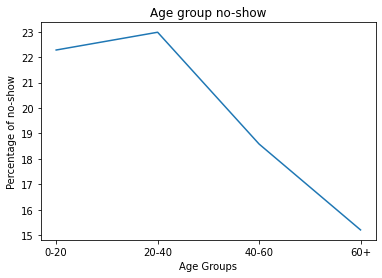

In [30]:
x_axis = ['0-20', '20-40', '40-60' , '60+']
y_axis = df.groupby('age_group').no_show.mean()
plt.plot(x_axis, y_axis * 100)
plt.title('Age group no-show')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of no-show');


<font size="3">People under 40 have the highest probability of not showing up, and percentage of not showing up decreases as people get older.</font>

<font size="5">Does a certain kind of patient likely to no-show more than the others?</font>

In [31]:
hiper_noshow = df.groupby('hipertension').no_show.mean()[1]
diabetes_noshow = df.groupby('diabetes').no_show.mean()[1]
alcoholism_noshow = df.groupby('alcoholism').no_show.mean()[1]
handicap_noshow = df.groupby('handicap').no_show.mean()[1]
hiper_noshow, diabetes_noshow, alcoholism_noshow, handicap_noshow

(0.17301958625751113,
 0.18003273322422259,
 0.20148809523809524,
 0.18161535029004908)

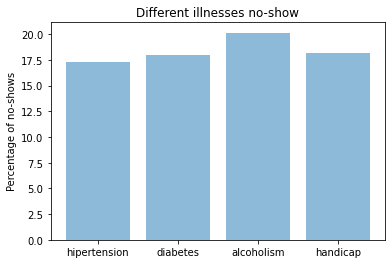

In [32]:
objects = ('hipertension', 'diabetes', 'alcoholism', 'handicap')
values = (hiper_noshow*100, diabetes_noshow*100, alcoholism_noshow*100, handicap_noshow*100)
y_pos = np.arange(len(objects))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Different illnesses no-show')
plt.ylabel('Percentage of no-shows');

<font size="3">The results of no-show for people suffering from different illnesses are close with a slight edge to the people suffering from alcoholism which no-show the most</font>

<font size="5">Do people with scholarships no-show more or less?</font>

In [33]:
scholarship_noshow = df.groupby('scholarship').no_show.mean()
scholarship_noshow

scholarship
0    0.198074
1    0.237363
Name: no_show, dtype: float64

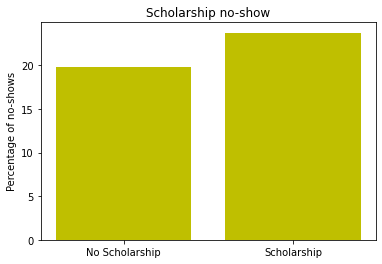

In [34]:
x_labels = ['No Scholarship', 'Scholarship']
heights = scholarship_noshow * 100
bar_graph(x_labels, heights, 'Scholarship no-show', 'Percentage of no-shows', 'y')

<font size="3">People that were enrolled in a Scholarship at some point tend to miss their appointments more.</font>

# Conclusions

<font size="3">1 - Less than 5% of people who scheduled an appointment on the same day didn't show up, while over 25% of people who scheduled on a different day didn't show up.</font>

<font size="3">2 - The SMS sending graph shows that sending an SMS has a negative effect on the no-show rate and the people that received an SMS tend to no-show more than people who didn't receive one.</font>

<font size="3">3 - Younger people tend to no-show more than older people with people between 20 to 40 having the biggest no-show rate at 23%</font>

<font size="3">4 - People that had a scholarship are more likely to not show up to their appointments.</font>

<font size="3">5 - Type of illness doesn't seem to cause a major difference in not showing up to an appointment</font>

<font size="5">Limitations</font>

<font size="3">1 - Conflicting results may occur due to some patients having multiple illnesses, if a seperate column showed the illness related to the specific visit we could better analyze the data.</font>

<font size="3">2 - All of the data provided is categorical except age therefore only simple graphs could be drawn.</font>

<font size="3">3 - No specifications for the SMS-received column about the reason of sending the SMS, if the SMS was sent for already being late for the example this may lead to inaccurate analysis.</font>